# Decision Tree Digits Dataset

In [51]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [52]:
RANDOM_SEED = 9
DATASPLIT = 0.3

In [53]:
dataset = load_digits(as_frame=True)


data = dataset.data
labels = dataset.target

data_train, data_test, label_train, label_test = train_test_split(data, labels, test_size=DATASPLIT, random_state=RANDOM_SEED)

data_train, data_val, label_train, label_val = train_test_split(data_train, label_train, test_size=DATASPLIT, random_state=RANDOM_SEED)

print(f"Train dataset length: {len(data_train)}, Validation dataset length: {len(data_val)}, Test dataset length: {len(data_test)}")
data_train.describe()


Train dataset length: 879, Validation dataset length: 378, Test dataset length: 540


,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,879.0,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,...,879.000000,879.000000,879.0,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000
mean,0.0,0.329920,5.270762,11.885097,11.988623,5.986348,1.485779,0.137656,0.004551,2.011377,...,3.535836,0.197952,0.0,0.309443,5.673493,12.129693,11.524460,6.488055,2.044369,0.374289
std,0.0,0.970125,4.777219,4.207786,4.220285,5.773618,3.455472,1.048018,0.095346,3.262943,...,4.870138,0.942272,0.0,0.978023,5.148732,4.295362,5.060142,5.960732,4.162867,1.909054
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,1.000000,11.000000,9.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,5.000000,13.000000,13.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,1.000000,0.000000,0.000000,3.000000,...,6.000000,0.000000,0.0,0.000000,10.000000,16.000000,16.000000,12.000000,1.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,10.000000,0.0,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [54]:
parameters = {
    'max_depth': range(3,20)
}

clf = GridSearchCV(DecisionTreeClassifier(random_state=RANDOM_SEED), parameters, verbose=1)

clf.fit(data_val, label_val)

model = clf.best_estimator_
print("Best corssvalidation score: ", clf.best_score_)
print("With parameters: ", clf.best_params_)

print("Training model with best parameters")
model.fit(data_train, label_train)

accuracy = model.score(data_test, label_test)
print("Accuracy: ", accuracy)

predictions = model.predict(data_test)
f1 = f1_score(label_test, predictions, average='weighted')

print("F1 score: ", f1)



Fitting 5 folds for each of 17 candidates, totalling 85 fits


Best corssvalidation score:  0.7563508771929823
With parameters:  {'max_depth': 11}
Training model with best parameters
Accuracy:  0.8351851851851851
F1 score:  0.8344731609962216


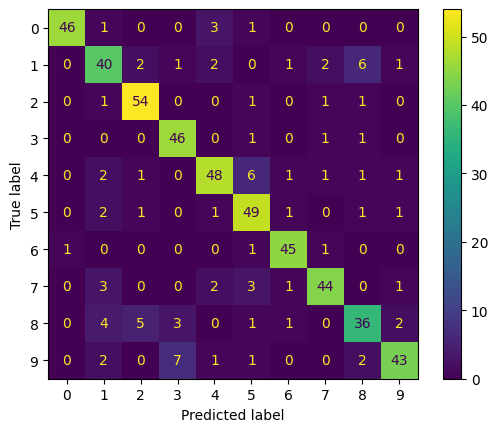

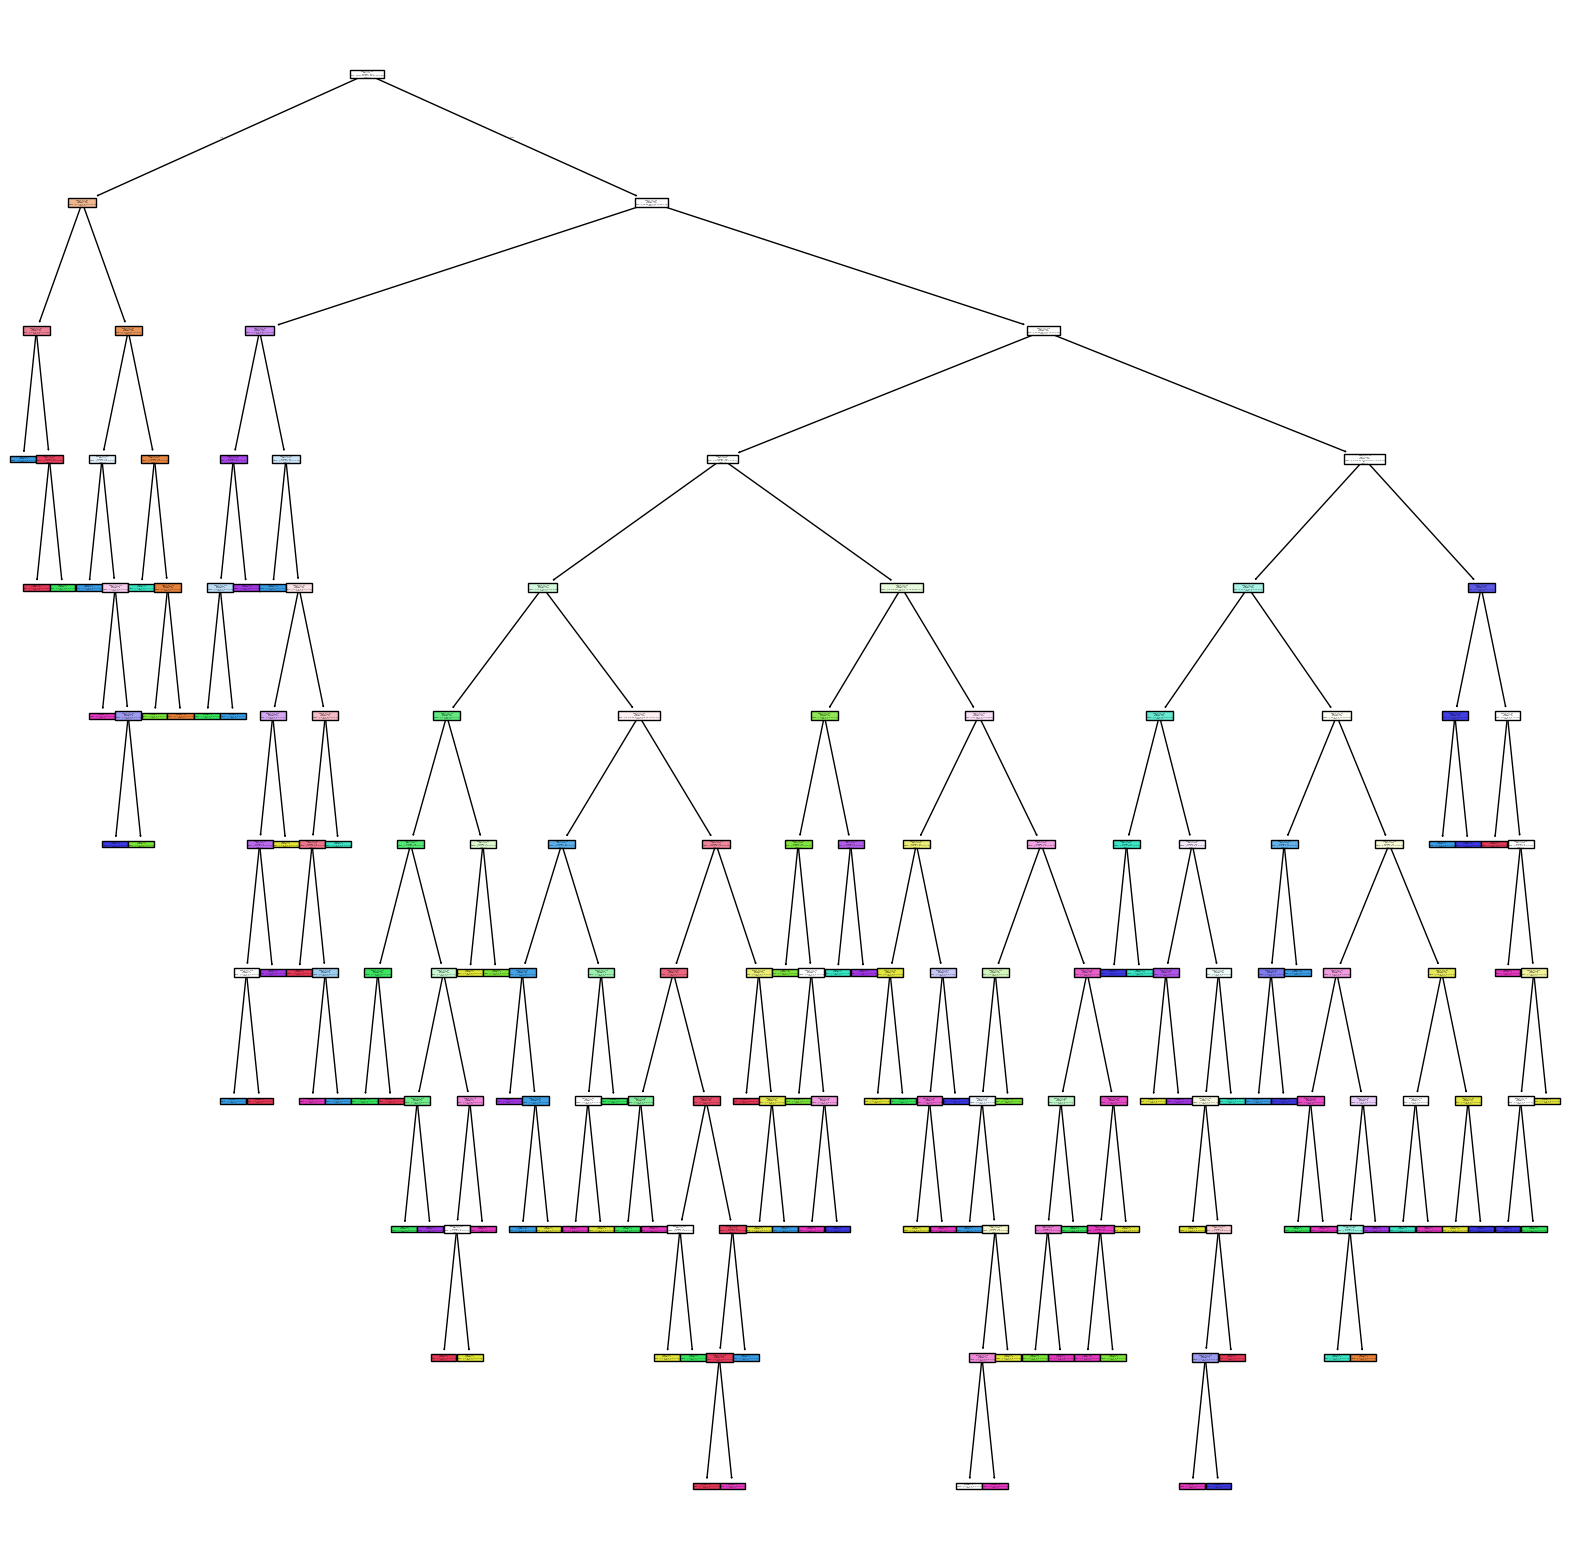

In [56]:
cm = confusion_matrix(label_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[str(label) for label in dataset.target_names])
disp.plot()
plt.show()

plt.figure(figsize=(20,20))
plot_tree(model, filled=True, feature_names=dataset.feature_names, class_names=[str(label) for label in dataset.target_names])
plt.show()